Creating a plot that shows global proportion of deaths due to road injuries from 2015-2019, for each sex

Data source: http://ghdx.healthdata.org/gbd-results-tool


Murray, Christopher J L et al. 2020. “Global Burden of 87 Risk Factors in 204 Countries and Territories, 1990–2019: A Systematic Analysis for the Global Burden of Disease Study 2019.” The Lancet 396(10258): 1223–49.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()     

Download data

In [2]:
url = 'https://gist.githubusercontent.com/tomdries/3ce6568300407e7447ccb09ac68c7d9f/raw/4dffee1627ea7e53315e72d4045bec2863fac319/gbddata.csv' 
csv = pd.read_csv(url)
csv

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,1,Global,1,Male,2,Early Neonatal,689,Road injuries,1,Number,2017,497.473915,642.286662,324.298019
1,1,Deaths,1,Global,2,Female,2,Early Neonatal,689,Road injuries,1,Number,2017,251.360520,316.395642,205.788134
2,1,Deaths,1,Global,3,Both,2,Early Neonatal,689,Road injuries,1,Number,2017,748.834435,947.175484,551.470920
3,1,Deaths,1,Global,1,Male,2,Early Neonatal,689,Road injuries,2,Percent,2017,0.000421,0.000524,0.000284
4,1,Deaths,1,Global,2,Female,2,Early Neonatal,689,Road injuries,2,Percent,2017,0.000286,0.000354,0.000248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1,Deaths,1,Global,2,Female,21,80 plus,689,Road injuries,2,Percent,2019,0.002402,0.002622,0.002024
1796,1,Deaths,1,Global,3,Both,21,80 plus,689,Road injuries,2,Percent,2019,0.003375,0.003622,0.002942
1797,1,Deaths,1,Global,1,Male,21,80 plus,689,Road injuries,3,Rate,2019,57.586851,63.170722,49.043024
1798,1,Deaths,1,Global,2,Female,21,80 plus,689,Road injuries,3,Rate,2019,24.691291,27.362653,20.456424


In [3]:
dfs = []
for sex in ['Male', 'Female']:
    data = csv[(csv.metric_name == 'Number') & (csv.sex_name == sex)]
    age_labels_sorted = data.sort_values('age_id').age_name.unique() #contains text age labels sorted
    df = data.pivot_table('val', index='age_name', columns = 'cause_name', aggfunc=sum)
    df['pct'] = df['Road injuries']/df['All causes']*100
    df = df.loc[age_labels_sorted]
    dfs.append(df)


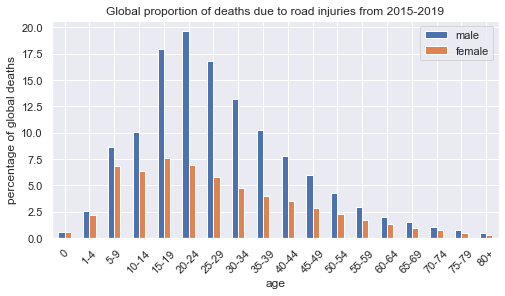

In [4]:
fig, ax = plt.subplots(figsize=(8,4))
pct_male = dfs[0].pct
pct_female = dfs[1].pct
df_pct = pd.DataFrame({'male': pct_male, 'female': pct_female})
df_pct.index = df_pct.index.str.replace(' to ', '-')
df_pct.index = df_pct.index.str.replace('Post Neonatal', '0')
df_pct.index = df_pct.index.str.replace('80 plus', '80+')

df_pct = df_pct.iloc[2:]
df_pct.plot.bar(ax=ax, rot=45); 
plt.title('Global proportion of deaths due to road injuries from 2015-2019');
ax.set_xlabel('age');
ax.set_ylabel('percentage of global deaths');
plt.savefig('figures/fig1.png', dpi=600)